## Loading Library

In [65]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates

!pip install mlxtend==0.23.1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 5, 2024** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [66]:
#1
df = pd.read_csv("https://raw.githubusercontent.com/KINGCAHYADI/DATA-MINING/refs/heads/main/bread%20basket.csv")
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [67]:
#2 info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
#3 check missing values
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Transaction,0
Item,0
date_time,0
period_day,0
weekday_weekend,0


4. The overview reveals a _________________________. (fill that blank on the section below)

no missing value

### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-69-b9830ca83cb6>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date_time']).dt.date
<ipython-input-69-b9830ca83cb6>:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['hour'] = pd.to_datetime(df['date_time']).dt.hour


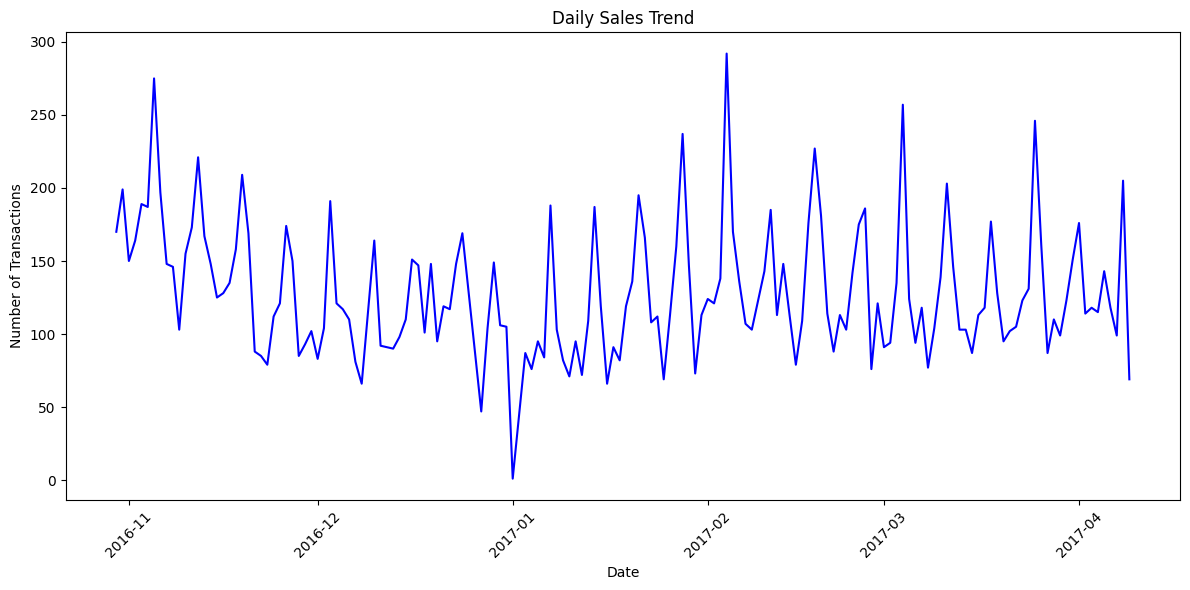

In [69]:
# 5
df['date'] = pd.to_datetime(df['date_time']).dt.date
df['hour'] = pd.to_datetime(df['date_time']).dt.hour


# Aggregate data: Count transactions per day
daily_sales = df.groupby('date').size()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, label='Transactions', linestyle='-', marker='', color='blue')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Daily Sales Trend')

# Format the x-axis for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [70]:
# 6
df['day'] = pd.to_datetime(df['date_time']).dt.day
df['month'] = pd.to_datetime(df['date_time']).dt.month
df['year'] = pd.to_datetime(df['date_time']).dt.year
df['time'] = pd.to_datetime(df['date_time']).dt.time
df['hour'] = pd.to_datetime(df['date_time']).dt.hour
df['day_name'] = pd.to_datetime(df['date_time']).dt.day_name()
df = df.drop(columns=['date'])
df.sample(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-70-3b4222b81df0>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['day'] = pd.to_datetime(df['date_time']).dt.day
<ipython-input-70-3b4222b81df0>:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['month'] = pd.to_datetime(df['date_time']).dt.month
<ipython-input-70-3b4222b81df0>:4: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specif

,Transaction,Item,date_time,period_day,weekday_weekend,hour,day,month,year,time,day_name
8484,4270,Frittata,06-01-2017 16:09,afternoon,weekday,16,6,1,2017,16:09:00,Friday
6325,3163,Jammie Dodgers,14-12-2016 15:57,afternoon,weekday,15,14,12,2016,15:57:00,Wednesday
5611,2788,Coffee,07-12-2016 17:04,evening,weekday,17,7,12,2016,17:04:00,Wednesday
5263,2611,Cake,04-12-2016 14:07,afternoon,weekend,14,4,12,2016,14:07:00,Sunday
3696,1790,Medialuna,20-11-2016 15:14,afternoon,weekend,15,20,11,2016,15:14:00,Sunday



Alright, now I can easily create a visualization of monthly sales.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-71-e497299781f9>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date_time'])


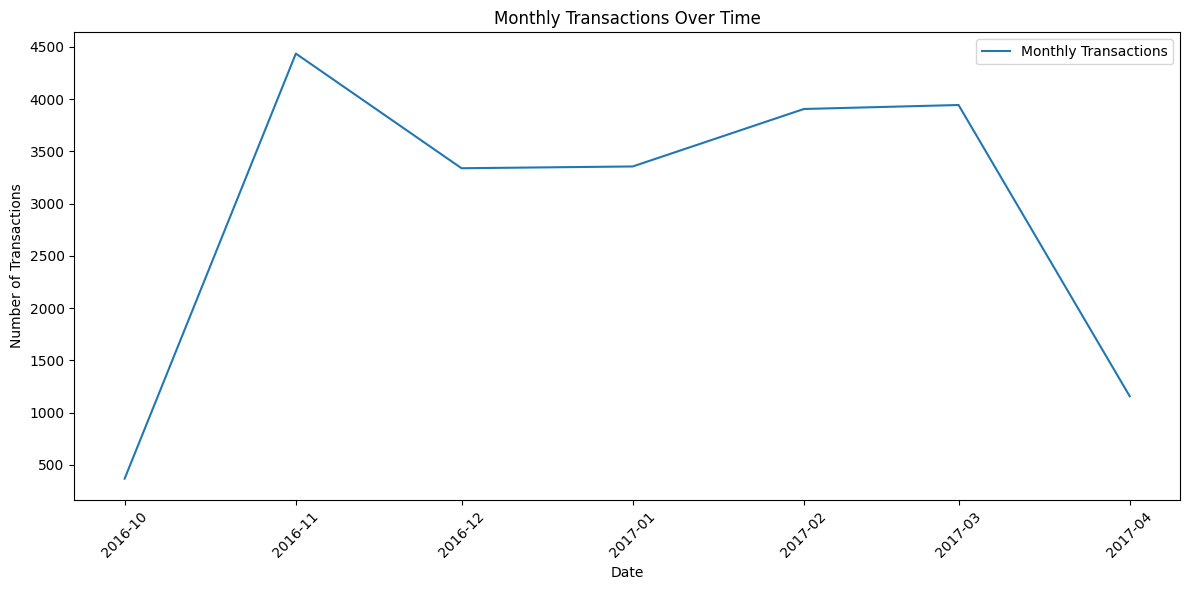

In [71]:
# 7
df['date'] = pd.to_datetime(df['date_time'])

monthly_transactions = df.groupby(['year', 'month']).size()

monthly_transactions = monthly_transactions.reset_index(name='Transaction Count')

monthly_transactions['date'] = pd.to_datetime(
    monthly_transactions[['year', 'month']].assign(Day=1)
)

plt.figure(figsize=(12, 6))
plt.plot(monthly_transactions['date'], monthly_transactions['Transaction Count'], label='Monthly Transactions')

plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Monthly Transactions Over Time')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


8. Now, the visualization above provides better insights: _________________________. (fill that blank on the section below)

The number of transactions saw the largest increase between October 2016 and November 2016. However, from December 2016 to March 2017, the transaction volume remained stable. Subsequently, there was a decline in transactions from March 2017 to April 2017.

Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??

In [72]:
#9
weekday_names = df.loc[df['weekday_weekend'] == 'weekday', 'day_name'].unique()
weekend_names = df.loc[df['weekday_weekend'] == 'weekend', 'day_name'].unique()

print("Unique weekday names:", weekday_names)
print("Unique weekend names:", weekend_names)

Unique weekday names: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Unique weekend names: ['Sunday' 'Saturday']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [73]:
#10
df['date_time'] = pd.to_datetime(df['date_time'])

df['month'] = df['date_time'].dt.month
df['day_name'] = df['date_time'].dt.day_name()

aggregation = df.pivot_table(
    index='month',
    columns='day_name',
    values='Transaction',
    aggfunc='count',
    fill_value=0
)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
aggregation = aggregation[day_order]

aggregation


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-73-bf53f301dc07>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time'] = pd.to_datetime(df['date_time'])


day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month,,,,,,,
1,329,474,322,399,489,807,536
2,474,429,419,456,599,879,650
3,379,433,459,557,674,883,559
4,118,115,143,118,99,381,183
10,199,0,0,0,0,0,170
11,469,599,576,591,639,879,683
12,356,342,402,525,624,776,314


11. Wow, it turns out the insight that can be gained from the table above is _____


Weekends, particularly Saturdays, consistently record the highest transaction volumes across all months, whereas weekdays like Mondays typically see fewer transactions. Additionally, December experiences a notable surge in transactions driven by holiday shopping, while April shows a significant decline, highlighting clear seasonal patterns.


It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


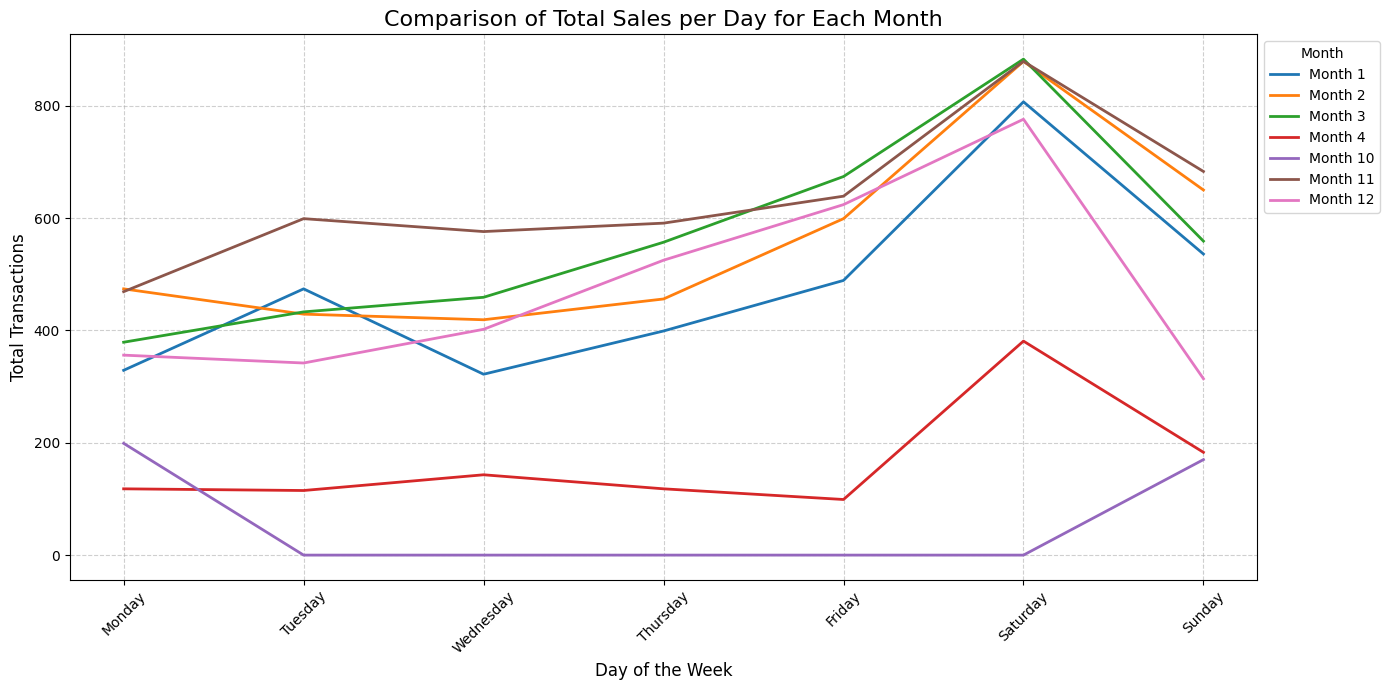

In [74]:
# 12

# Transpose the pivot table so that the days of the week are on the x-axis
pivot_table_t = aggregation.T

# Plot the line chart
plt.figure(figsize=(14, 7))

# Plot each month's data as a line, where the x-axis is the day of the week
for month in pivot_table_t.columns:
    plt.plot(pivot_table_t.index, pivot_table_t[month], label=f'Month {month}', linewidth=2, markersize=6)

# Add title and labels
plt.title('Comparison of Total Sales per Day for Each Month', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Transactions', fontsize=12)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Add a legend to show which line corresponds to which month
plt.legend(title='Month', loc='upper left', bbox_to_anchor=(1, 1))

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Adjust layout to fit everything
plt.tight_layout()

# Show the plot
plt.show()


13. Wow, after visualizing it like this, I can gain insights into the sales trends that ____.

Sales trends show that weekends, particularly Saturdays, drive the highest activity, with Fridays also performing well in specific months. Weekday sales are stable but less dynamic. Seasonal dips occur in April and October, while November and December see significant sales spikes due to holiday shopping and promotions.








Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [75]:
# 14
df['period_day'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['morning', 'afternoon', 'evening', 'night'], dtype=object)

Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [76]:
# 15
morning_hour = df.loc[df['period_day'] == 'morning', 'hour'].unique()

# Extract unique weekend names
afternoon_hour = df.loc[df['period_day'] == 'afternoon', 'hour'].unique()

evening_hour = df.loc[df['period_day'] == 'evening', 'hour'].unique()

night_hour = df.loc[df['period_day'] == 'night', 'hour'].unique()

print("Unique morning_hour:", morning_hour)
print("Unique afternoon_hour:", afternoon_hour)
print("Unique evening_hour:", evening_hour)
print("Unique night_hour:", night_hour)

Unique morning_hour: [ 9 10 11  8  7  1]
Unique afternoon_hour: [12 13 14 15 16]
Unique evening_hour: [17 18 19 20]
Unique night_hour: [21 23 22]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


16. Hah, I found something odd in the results above. Did you notice it too? What do you think is odd about it and why?

The inclusion of 1:00 AM in the "morning_hour" category is unusual, as it is typically considered part of the night. This likely results from a data misclassification and should be corrected by moving it to the night or early morning period.


But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


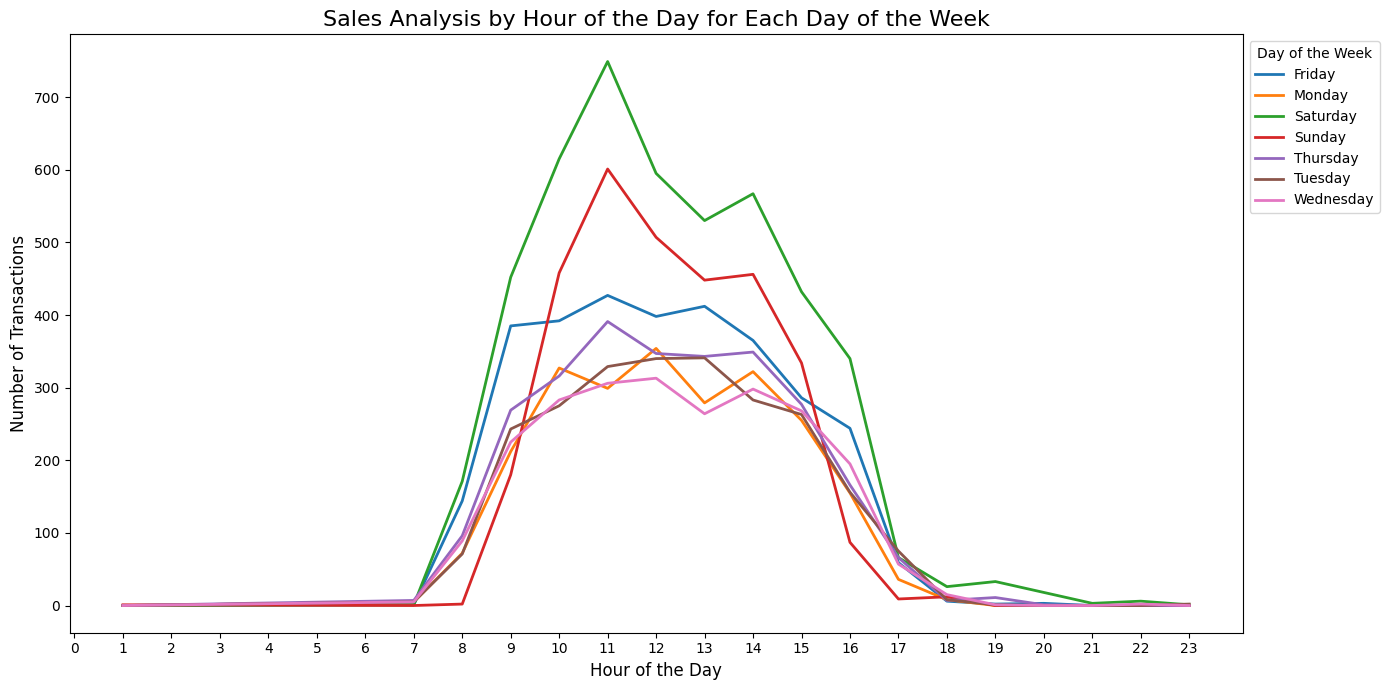

In [77]:
# 17
import matplotlib.pyplot as plt

# Aggregate the total number of transactions by hour for each day of the week
sales_by_hour = df.groupby(['hour', 'day_name']).size().unstack(fill_value=0)

# Plot the line chart for each day
plt.figure(figsize=(14, 7))

for day in sales_by_hour.columns:
    plt.plot(sales_by_hour.index, sales_by_hour[day], label=day, linewidth=2, markersize=6)

# Add title and labels
plt.title('Sales Analysis by Hour of the Day for Each Day of the Week', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(range(24))

# Add a legend for the days of the week
plt.legend(title='Day of the Week', loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to ensure everything fits
plt.tight_layout()

# Show the plot
plt.show()


18. The daily sales trend plot reveals that _______


The daily sales trend reveals that transactions follow a consistent pattern throughout the week. Sales begin to rise in the morning (around 8 AM), peak between morning and afternoon (from 10 AM to 2 PM), and then gradually decline throughout the rest of the day, with a significant drop after 4 PM. Saturday stands out with the highest peak in transactions compared to other days, indicating it is the busiest day. Sunday and Friday also show relatively high peaks, while midweek days like Tuesday and Wednesday exhibit more moderate transaction levels. This trend highlights the importance of focusing resources on peak hours, especially during the weekend.

### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


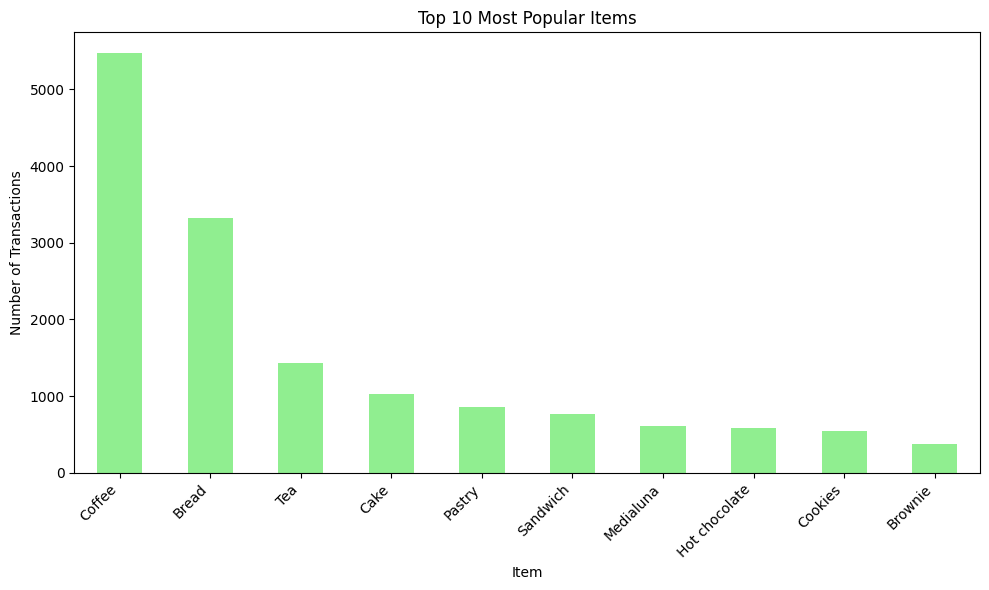

In [78]:
# Calculate the count of transactions for each item
item_counts = df.groupby('Item').size().sort_values(ascending=False)

# Get top 10 most popular items
top_items = item_counts.head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_items.plot(kind='bar', color='lightgreen')  # Changed bar color to light green

# Add labels and title
plt.xlabel('Item')
plt.ylabel('Number of Transactions')
plt.title('Top 10 Most Popular Items')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


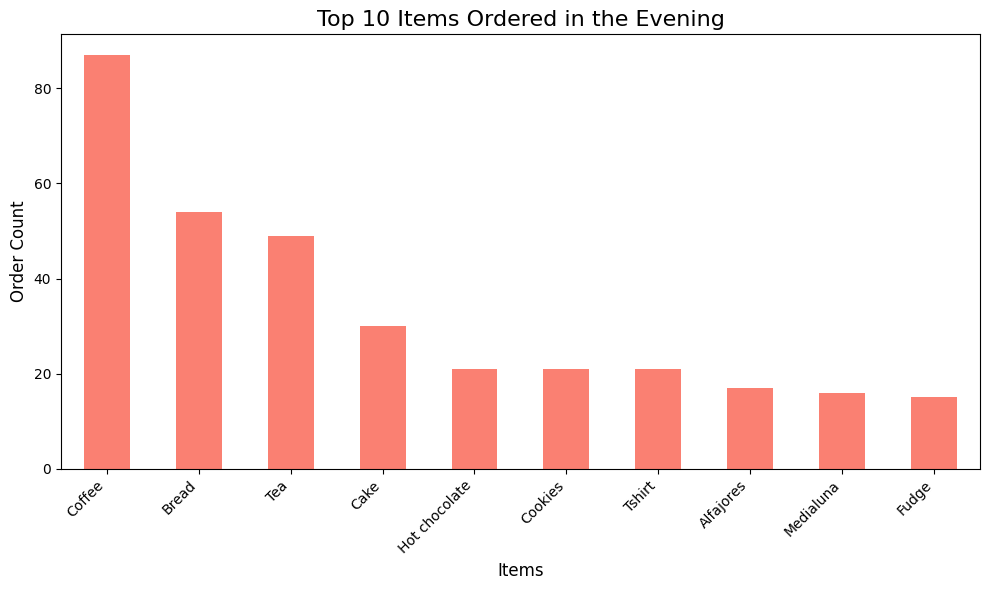

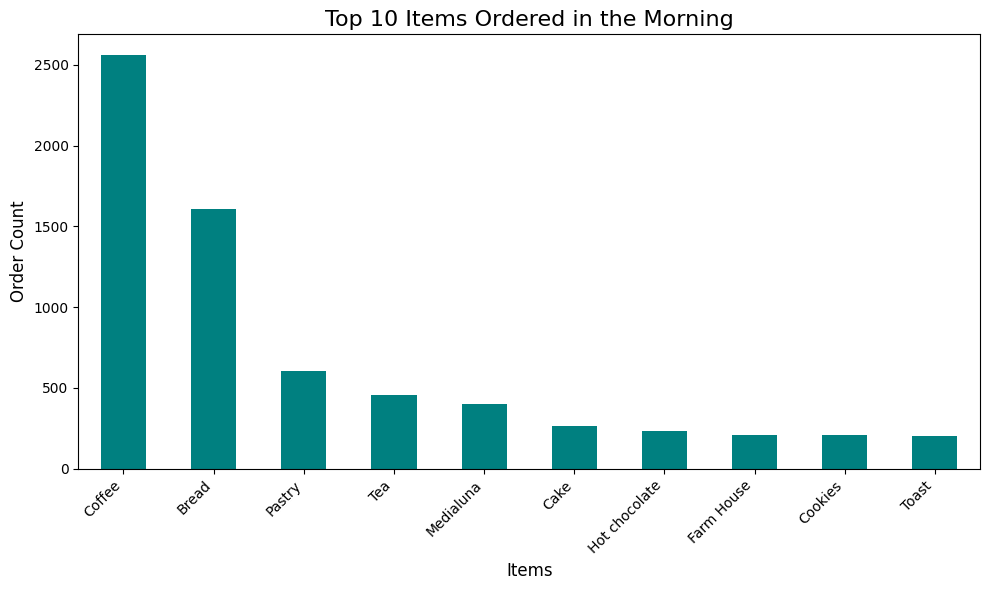

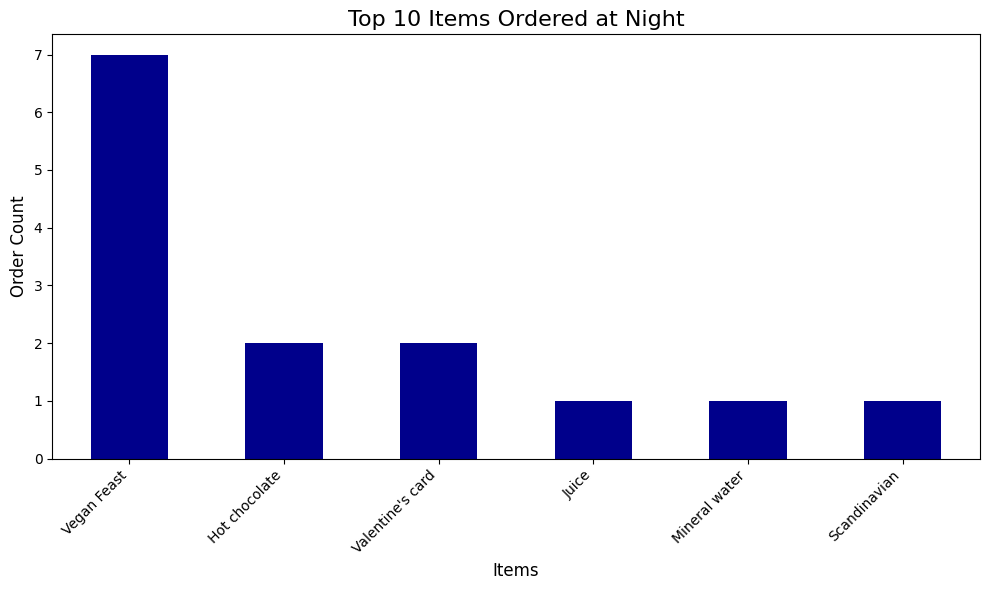

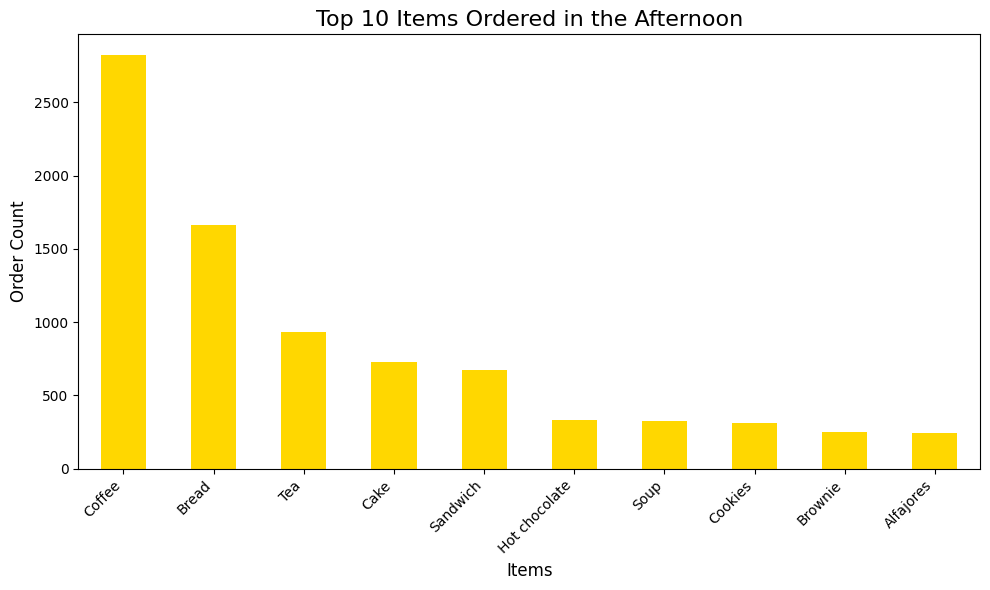

In [79]:
# 20
# Filter data for evening period and count item orders
evening_sales = df[df['period_day'] == 'evening']
evening_item_counts = evening_sales['Item'].value_counts()
top_10_evening_items = evening_item_counts[:10]

# Plot the top 10 evening items
plt.figure(figsize=(10, 6))
top_10_evening_items.plot(kind='bar', color='salmon')  # Changed color for differentiation
plt.title('Top 10 Items Ordered in the Evening', fontsize=16)
plt.xlabel('Items', fontsize=12)
plt.ylabel('Order Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Filter data for morning period and count item orders
morning_sales = df[df['period_day'] == 'morning']
morning_item_counts = morning_sales['Item'].value_counts()
top_10_morning_items = morning_item_counts[:10]

# Plot the top 10 morning items
plt.figure(figsize=(10, 6))
top_10_morning_items.plot(kind='bar', color='teal')
plt.title('Top 10 Items Ordered in the Morning', fontsize=16)
plt.xlabel('Items', fontsize=12)
plt.ylabel('Order Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Filter data for night period and count item orders
night_sales = df[df['period_day'] == 'night']
night_item_counts = night_sales['Item'].value_counts()
top_10_night_items = night_item_counts[:10]

# Plot the top 10 night items
plt.figure(figsize=(10, 6))
top_10_night_items.plot(kind='bar', color='darkblue')
plt.title('Top 10 Items Ordered at Night', fontsize=16)
plt.xlabel('Items', fontsize=12)
plt.ylabel('Order Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Filter data for afternoon period and count item orders
afternoon_sales = df[df['period_day'] == 'afternoon']
afternoon_item_counts = afternoon_sales['Item'].value_counts()
top_10_afternoon_items = afternoon_item_counts[:10]

# Plot the top 10 afternoon items
plt.figure(figsize=(10, 6))
top_10_afternoon_items.plot(kind='bar', color='gold')
plt.title('Top 10 Items Ordered in the Afternoon', fontsize=16)
plt.xlabel('Items', fontsize=12)
plt.ylabel('Order Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


21. It turns out that there is something different in the plot above, the insight is ____


Each time period—morning, afternoon, evening, and night—shows different trends in the frequency of item sales, revealing how consumer behavior changes throughout the day. For example, in the morning, items like coffee or breakfast products may be more popular, reflecting people's routines and preferences early in the day. In the afternoon, items like snacks or beverages might see a surge in demand as people look for an energy boost or a small meal. In the evening, the popularity of dinner-related items or heavier snacks may rise, especially as people begin to relax after work. At night, comfort food or late-night snacks might dominate sales. These variations indicate that different items cater to specific needs or habits depending on the time of day. By identifying these patterns, businesses can better align their marketing strategies, promotions, and inventory management with peak demand times, ensuring that resources are allocated efficiently during high-demand periods and avoiding overstocking during quieter times.

I found a valentine card, I was curious about when people bought it so I made a visualization of it

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-80-6b9a075d9c51>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valentine_sales['date'] = pd.to_datetime(valentine_sales['date_time']).dt.date


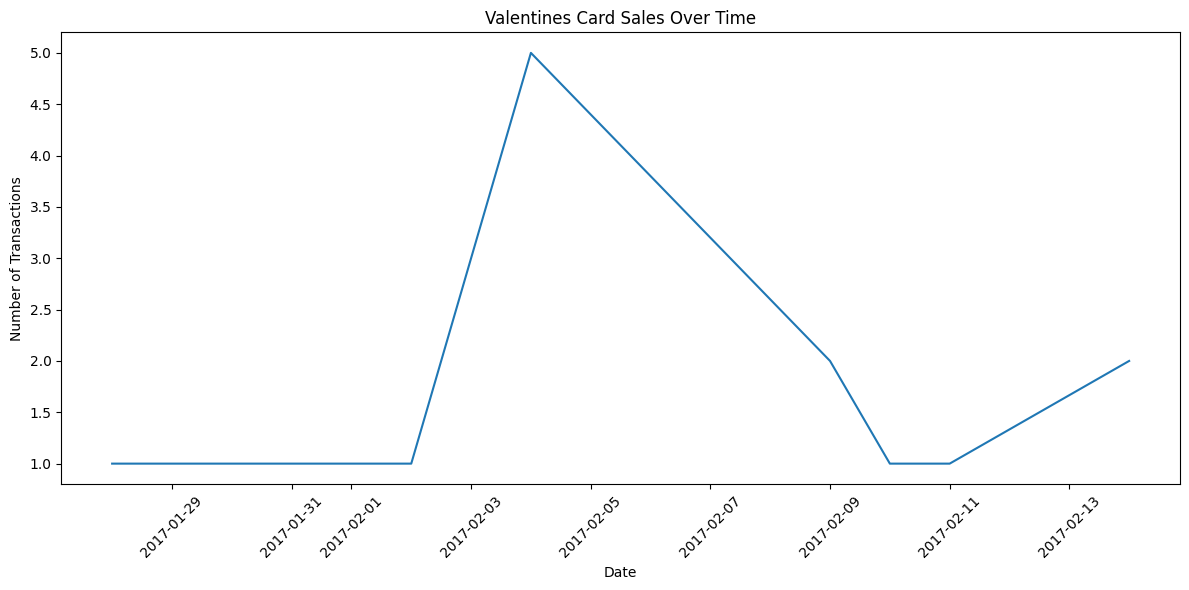

In [80]:
#22
valentine_sales = df[df['Item'].str.contains('Valentine', case=False, na=False)]

valentine_sales['date'] = pd.to_datetime(valentine_sales['date_time']).dt.date
sales_by_date = valentine_sales.groupby('date').size()

plt.figure(figsize=(12, 6))
plt.plot(sales_by_date.index, sales_by_date.values, linestyle='-', label='Valentine Card Sales')

plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Valentines Card Sales Over Time')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

23. I found the insight from the sale of the Valentine's cards above is ____


The sales trend for Valentine’s cards shows a steady and low level of sales from the end of January to early February, followed by a sharp increase around February 2, peaking on February 5 with more than 5 cards sold per day. After this peak, sales gradually decline, reaching their lowest point on February 10 and 11. However, there is a slight uptick in sales as Valentine’s Day approaches, indicating a last-minute rush from buyers. Overall, the highest demand occurs approximately 10 days before Valentine’s Day.

## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [93]:
# 24
apriori_data = pd.crosstab(df['Transaction'], df['Item'])
apriori_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
#25

# Convert quantities to 1 and 0
basket_encoded = apriori_data.applymap(lambda x: 1 if x > 0 else 0)
basket_encoded.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-94-024034fe465c>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = apriori_data.applymap(lambda x: 1 if x > 0 else 0)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. (min_support=0.02, metric="lift", min_threshold=1)

In [98]:
#26
frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True)

# Create a DataFrame with 'support' and 'itemsets' columns
frequent_itemsets_df = frequent_itemsets[['support', 'itemsets']]

# Display the DataFrame
display(frequent_itemsets_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  branches.append(branch)


,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)
5,0.054411,(Cookies)
6,0.039197,(Farm House)
7,0.058320,(Hot chocolate)
8,0.038563,(Juice)
9,0.061807,(Medialuna)


In [100]:
# 27
frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True)

# Create a DataFrame with 'support' and 'itemsets' columns
frequent_itemsets_df = frequent_itemsets[['support', 'itemsets']]

# Display the DataFrame
display(frequent_itemsets_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  branches.append(branch)


,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)
5,0.054411,(Cookies)
6,0.039197,(Farm House)
7,0.058320,(Hot chocolate)
8,0.038563,(Juice)
9,0.061807,(Medialuna)


## Conclusion: The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:



As I conclude my day of analysis, I compile key insights from The Bread Basket dataset into a comprehensive report:

Daily Transaction Trends:

The bakery experiences peak sales on weekends (Saturdays and Sundays), aligning with customers’ leisure time and their tendency to enjoy baked goods as part of their weekend routine.
The busiest hours are between 10:00 AM and 12:00 PM, indicating that customers often visit for morning or midday snacks or to purchase bread for their meals.
Sales generally increase towards the end of the year, likely driven by the holiday season and celebrations.
Product Popularity:

The most popular items are Coffee, Bread, and Tea, reflecting the bakery’s core offerings and customers' preference for these staple products.
The popularity of items like Coffee, Bread, Tea, and Pastry remains consistent throughout different periods of the day (morning, afternoon, evening, night), showing that customer preferences for these products are not time-sensitive.
However, in the afternoon, items like Cake, Hot Chocolate, and Cookies show relatively high sales, indicating a preference for these as afternoon snacks.
Valentine’s Cards see a sales peak in February, particularly around February 14 (Valentine’s Day), aligning with the seasonal nature of the product.
Product Associations (Apriori Algorithm):

The Apriori algorithm reveals frequent product associations. For example, Coffee and Toast are often purchased together, supported by a high lift value.
Other common associations include Coffee with Medialuna, Pastry, and Cake, which could inform bundle offers or promotions to encourage combined purchases.
Recommendations:
Based on these insights, the following recommendations are suggested for the bakery:

Staffing and Inventory:

Optimize staff allocation and inventory management to handle higher demand during peak hours (10:00 AM to 12:00 PM) and on weekends.
Promotional Strategies:

Introduce bundle deals or discounts for popular combinations, such as Coffee and Toast, to encourage additional purchases.
Product Focus:

Emphasize core products like Coffee, Bread, Tea, and Pastry while maintaining adequate stock to meet consistent demand.
Seasonal and Event-Based Marketing:

Leverage holiday seasons and special occasions, such as Valentine’s Day, with targeted marketing campaigns and tailored product offerings to boost sales.
Afternoon Snacks:

Promote items like Cookies, Cake, and Hot Chocolate in the afternoon to cater to customer preferences for afternoon treats.
By utilizing data-driven insights and implementing these recommendations, the bakery can enhance its offerings, streamline operations, and improve customer satisfaction.